In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load Data

In [5]:
train_df = pd.read_csv('train.csv', index_col='PassengerId')
test_df = pd.read_csv('test.csv', index_col='PassengerId')
type(train_df)

pandas.core.frame.DataFrame

In [6]:
# adding test survived with default value
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
test_df['Survived'] = -888

In [8]:
#concat test and train
df = pd.concat((train_df, test_df), axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


# Data Mungling

## Missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


## Feature: Embarked

In [10]:
# extract rows with null values
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [11]:
# how many people embarked at different points

df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [13]:
# which point has higher survival count
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [14]:
#  OPtion 1: impute missing value with 'S'
#df.loc[df.Embarked.isnull, 'Embarked'] = 'S'
#df.Embarked.fillna('S', inplace = True)

In [15]:
# Option2 : explore the fare of each class for each embarked point
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [16]:
# replace with C
df.Embarked.fillna('C', inplace = True)

In [17]:
# check if null values remaining
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


# Feature: Fare

In [19]:
# extract null rows
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [22]:
# explore fare in Pclass3 and Emarked S
median_fare = df.loc[(df.Pclass ==3) & (df.Embarked == 'S'), 'Fare'].median()
print(median_fare)

8.05


In [23]:
# replace
df.Fare.fillna(median_fare, inplace = True)

In [24]:
# check
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


# Feature: Age

In [26]:
# extract null rows
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,3,female,0,-888,334915
1302,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,female,0,-888,365237
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236


## many rows missing. 

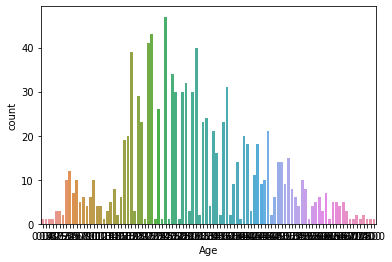

In [29]:
# age plots
sns.countplot(x = 'Age', data = df )
plt.show()

In [30]:
# option 1: replace all with mean
# issue: few higg points pushing mean
# df.Age.fillna(df.Age.mean(), inplace = True)

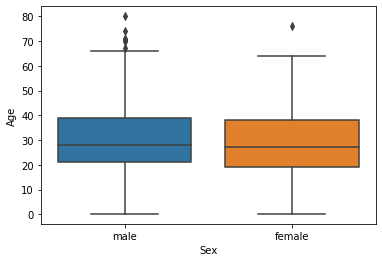

In [37]:
# option 2:explore gender
sns.boxplot(x = 'Sex', y = 'Age', data =df)
plt.show()
# silimar ditribution, not a good choice
# age_sex_median = df.groupby('Sex').Age.transform('median')
# df.Age.fillna()

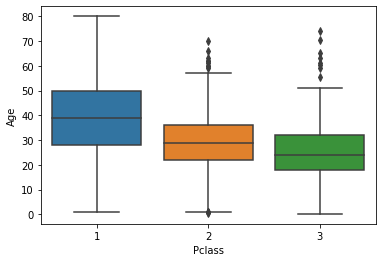

In [38]:
# option3 : explore Pclass
sns.boxplot(x = 'Pclass', y = 'Age', data = df)
plt.show()

In [39]:
# looks not bad
# age_Pclass_median = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna()

In [40]:
# option4 : replace with age of title
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [43]:
# function to extract title from name
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [44]:
# use map function to apply grttitle on each name value row i
df.Name.map(lambda x : GetTitle(x) ).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [45]:
# adjust function to extract title
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [47]:
# create title feature
df['Title'] = df.Name.map(lambda x : GetTitle(x))
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


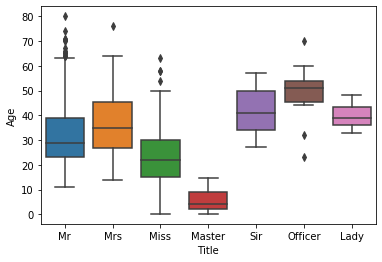

In [49]:
# box plot
sns.boxplot(x = 'Title', y = 'Age', data =df)
plt.show()

In [50]:
# good candidate for replacing missing values!
title_age_mean = df.groupby('Title').Age.transform('mean')
df.Age.fillna(title_age_mean, inplace = True)

In [52]:
# check null
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


# Outliers

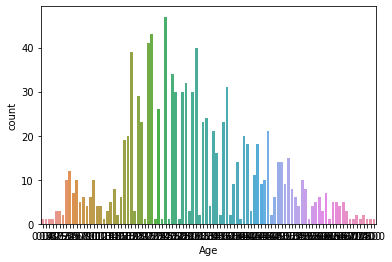

In [9]:
# explore Age distribution
sns.countplot(x = 'Age', data = df)
plt.show()

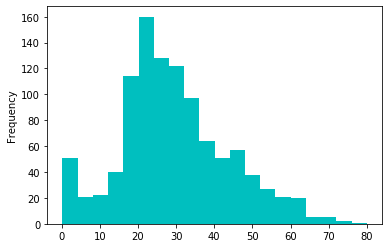

In [13]:
df.Age.plot(kind = 'hist', title = 'Hist for Age', bins = 20, color = 'c')
plt.show()

In [14]:
# show age>70
df.loc[df.Age> 70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877


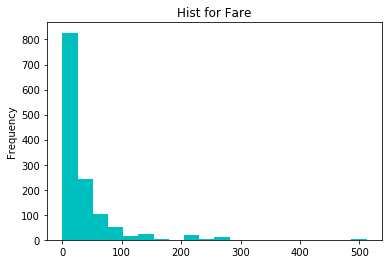

In [15]:
# explore Fare
df.Fare.plot(kind = 'hist', title = 'Hist for Fare', bins = 20, color = 'c')
plt.show()

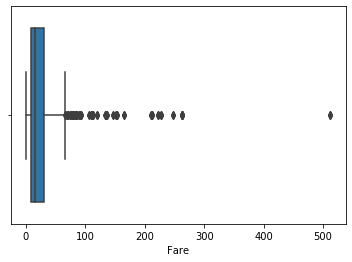

In [16]:
# boxplot to identify outliers
sns.boxplot(x = 'Fare', data = df)
plt.show()

In [17]:
# look into the outliers
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755


In [18]:
# try some transformations to reduce the skewness
LogFare = np.log(df.Fare + 1.0) # adding 1 to accomadate fare=0, log(0) no meaning.


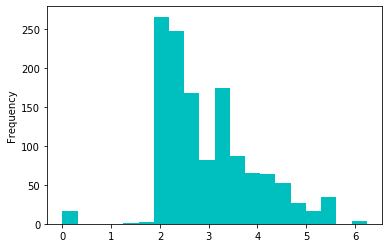

In [20]:
# histplot
LogFare.plot(kind = 'hist', bins = 20, color = 'c')
plt.show()
# u can tell lts less skew

In [22]:
# binning
Fare_bin = pd.qcut(df.Fare, 4, labels = ['very_low', 'low', 'high', 'very_high']) #discretization

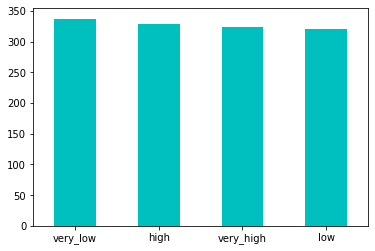

In [27]:
#sns.countplot( x = 'Fare_bin', data = df)
#plt.show()
Fare_bin = pd.qcut(df.Fare, 4, labels = ['very_low', 'low', 'high', 'very_high']).value_counts().plot(kind = 'bar', color = 'c', rot =0)

we can see similar observations in each bin, so create new feature.

In [28]:
df['Fare_bin'] =  pd.qcut(df.Fare, 4, labels = ['very_low', 'low', 'high', 'very_high'])

# Feature Engineering